In [68]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = []
y = [[],[],[],[],[]]
y2 = [[],[],[],[],[]]
y3 = [[],[],[],[],[]]


#Time-Han	PTS	TTV	SET	CTV	EBC	Time-Chen	PTS	TTV	SET	CTV	EBC
with open('election.csv', 'r') as csvfile:
    plots = csv.reader(csvfile)
    for row in plots:
        if(row != ['','','','','']):
            x.append(row[0])
            for j in range(0,5):
                y[j].append(row[j+1])
    with open('election2.csv', 'r') as csvfile:
        plots2 = csv.reader(csvfile)
        for row in plots2:
            if(row != ['','','','','']):
                for j in range(0,5):
                    y2[j].append(row[j+1])

for i in range(0,73):
    for j in range(0,5):
        y3[j].append(int(y[j][i]) - int(y2[j][i]))


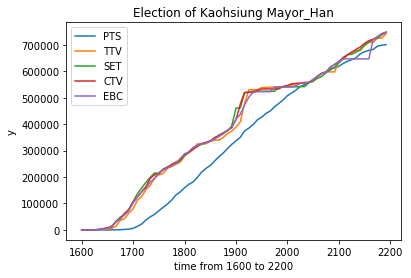

In [88]:
plt.plot(x[0:72],y[0][0:72], label='PTS')
plt.plot(x[0:72],y[1][0:72], label='TTV')
plt.plot(x[0:72],y[2][0:72], label='SET')
plt.plot(x[0:72],y[3][0:72], label='CTV')
plt.plot(x[0:72],y[4][0:72], label='EBC')
plt.xlabel('time from 1600 to 2200')
plt.ylabel('y')
plt.title('Election of Kaohsiung Mayor_Han')
plt.xticks([1,13,25,37,49,61,73],['1600','1700','1800','1900','2000','2100','2200'])

plt.legend()
plt.show()


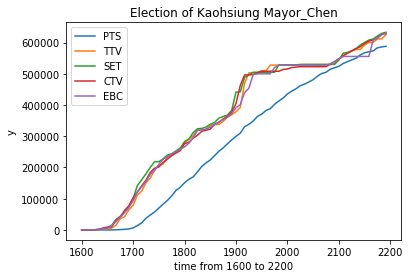

In [89]:
plt.plot(x[0:72],y2[0][0:72], label='PTS')
plt.plot(x[0:72],y2[1][0:72], label='TTV')
plt.plot(x[0:72],y2[2][0:72], label='SET')
plt.plot(x[0:72],y2[3][0:72], label='CTV')
plt.plot(x[0:72],y2[4][0:72], label='EBC')
plt.xlabel('time from 1600 to 2200')
plt.ylabel('y')
plt.title('Election of Kaohsiung Mayor_Chen')
plt.xticks([1,13,25,37,49,61,73],['1600','1700','1800','1900','2000','2100','2200'])
plt.legend()
plt.show()

藍色的是公視的票數進程，公視是採用國民黨黨部提供的開票數據（唯一在全台有足夠多監票員的大型機構），可以看到其他媒體都會浮報票數，並且會互相“借鑑”，最後發現苗頭不對會突然停止開票向公視靠攏

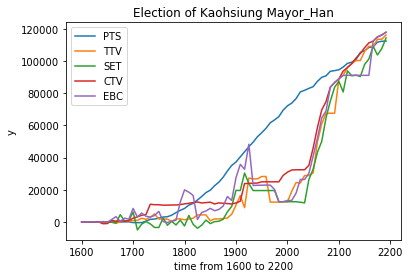

In [92]:
plt.plot(x[0:72],y3[0][0:72], label='PTS')
plt.plot(x[0:72],y3[1][0:72], label='TTV')
plt.plot(x[0:72],y3[2][0:72], label='SET')
plt.plot(x[0:72],y3[3][0:72], label='CTV')
plt.plot(x[0:72],y3[4][0:72], label='EBC')
plt.xlabel('time from 1600 to 2200')
plt.ylabel('y')
plt.title('Election of Kaohsiung Mayor_Han')
plt.xticks([1,13,25,37,49,61,73],['1600','1700','1800','1900','2000','2100','2200'])
plt.legend()
plt.show()

這是韓-陳的票數進程，可以看到媒體一開始都認為兩人會很拉鋸，甚至陳會贏韓（特別是綠線的三立），最後突然一個衝刺緊急修正

總而言之，開票時別太相信媒體